<h1 style="text-align:center; font-size:40px;"> Team 6 - TASK - 7 & 8 </h1>

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

## Importing the files (features and target) from https://archive.ics.uci.edu/dataset/2/adult

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df_adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = df_adult.data.features 
Y = df_adult.data.targets 


In [5]:
# Merging features and target table(X and Y)

df_adult = X.copy()
df_adult["income"] = Y.iloc[:, 0] 

In [7]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [8]:
df_adult["income_binary"] = (df_adult["income"] == ">50K").astype(int)
df_adult["income_binary"].value_counts()

income_binary
0    41001
1     7841
Name: count, dtype: int64

In [9]:
# Removing the trailing dot for income column
df_adult["income"] = df_adult["income"].str.strip().str.replace(".", "", regex=False)
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [10]:
#Other way to create income_binary column

# Creating binary income column
df_adult["income_binary"] = df_adult["income"].apply(lambda x: 1 if x == ">50K" else 0)


In [11]:
print(df_adult['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


# ═══════════════════════════════════════════════════════════════
#          BIVARIATE ANALYSIS
# ═══════════════════════════════════════════════════════════════

Bivariate analysis in machine learning examines the relationship between two variables (typically one feature and one target) to identify correlations, patterns, and dependencies, playing a crucial role in feature selection and exploratory data analysis (EDA). It involves comparing numerical-numerical, categorical-categorical, or mixed data types using methods like scatterplots, correlation matrices, and statistical tests (e.g., ANOVA, chi-square) to improve predictive model accuracy.

# ═══════════════════════════════════════════════════════════════
#          BIVARIATE ANALYSIS — Numerical vs Numerical
# ═══════════════════════════════════════════════════════════════

   

## Age vs Hours per week

In [12]:
import pandas as pd

# Calculate average hours worked per age
age_hours = df_adult.groupby('age')['hours-per-week'].mean().reset_index()

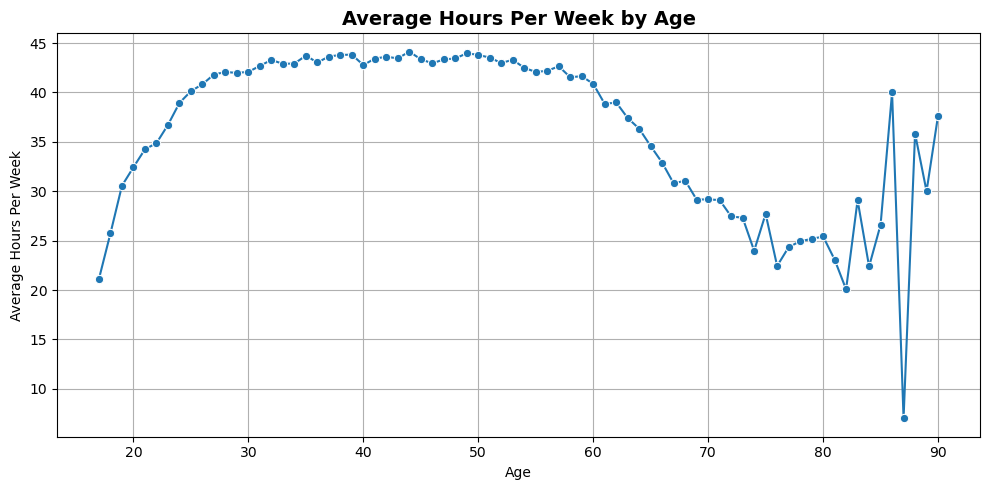

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=age_hours, x='age', y='hours-per-week', marker='o')

plt.title('Average Hours Per Week by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Average Hours Per Week')
plt.grid(True)
plt.tight_layout()
plt.show()

People work more hours as they move from their teens into adulthood, reaching their busiest years in their 30s and 40s. After age 50, work hours slowly drop, and they fall sharply after 60 as most people retire.

## Age vs Capital Income

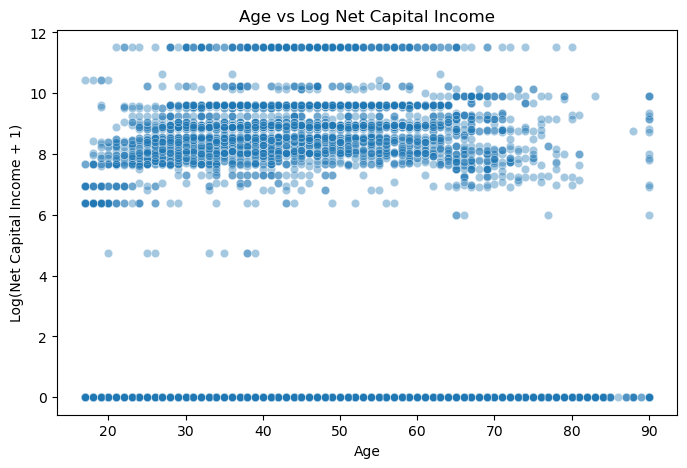

In [14]:
df_adult['net_capital'] = df_adult['capital-gain'] - df_adult['capital-loss']
df_adult['log_net_capital'] = np.log1p(df_adult['net_capital'].clip(lower=0))

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_adult, x='age', y='log_net_capital', alpha=0.4)
plt.title('Age vs Log Net Capital Income')
plt.xlabel('Age')
plt.ylabel('Log(Net Capital Income + 1)')
plt.show()

“The plot reveals that most individuals have zero net capital income, with positive capital income distributed primarily among adults aged 25 to 70. There is no clear trend linking age with net capital income, indicating that factors other than age influence capital income generation.”

# ═══════════════════════════════════════════════════════════════
#          BIVARIATE ANALYSIS — ALL NUMERICAL vs INCOME(target variable)
# ═══════════════════════════════════════════════════════════════

## Age vs Income

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_adult['age_bin'] = pd.cut(
    df_adult['age'],
    bins=[0, 25, 35, 50, 65, 100],
    labels=['Young (≤25)', 'Early Career (26–35)', 'Mid Career (36–50)',
            'Late Career (51–65)', 'Senior (65+)']
)


In [16]:
ct_age = pd.crosstab(df_adult['age_bin'], df_adult['income'])
ct_age

income,<=50K,>50K
age_bin,,
Young (≤25),9458,169
Early Career (26–35),10340,2379
Mid Career (36–50),10670,6018
Late Career (51–65),5241,2764
Senior (65+),1446,357


In [17]:
ct_age = pd.crosstab(df_adult['age_bin'], df_adult['income'], normalize='index')
ct_age

income,<=50K,>50K
age_bin,,
Young (≤25),0.982445,0.017555
Early Career (26–35),0.812957,0.187043
Mid Career (36–50),0.639382,0.360618
Late Career (51–65),0.654716,0.345284
Senior (65+),0.801997,0.198003


In [19]:
ct_age = pd.crosstab(df_adult['age_bin'], df_adult['income'], normalize='index') * 100
ct_age


income,<=50K,>50K
age_bin,,
Young (≤25),98.244521,1.755479
Early Career (26–35),81.295699,18.704301
Mid Career (36–50),63.938159,36.061841
Late Career (51–65),65.471580,34.528420
Senior (65+),80.199667,19.800333


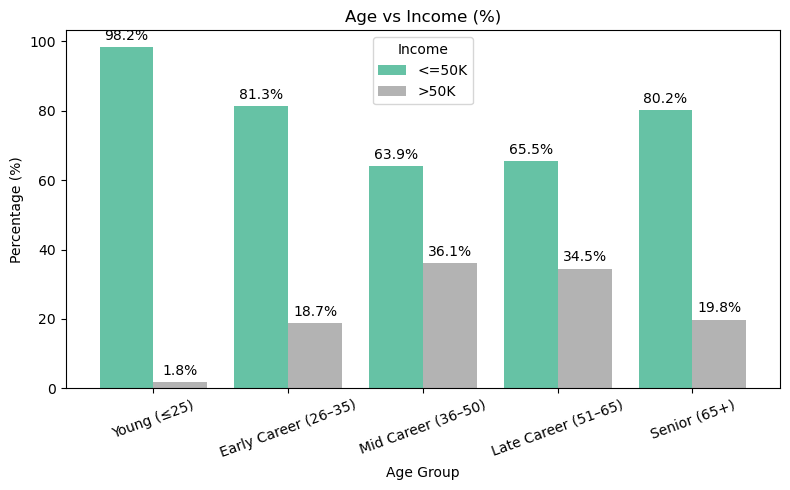

In [20]:
fig, ax = plt.subplots(figsize=(8,5))

ct_age.plot(kind='bar',ax=ax,stacked=False,colormap='Set2',width=0.8)

# Add percentage labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

ax.set_ylabel("Percentage (%)")
ax.set_title("Age vs Income (%)")
ax.set_xlabel("Age Group")
plt.xticks(rotation=20)

plt.legend(title="Income")
plt.tight_layout()
plt.show()

The proportion of individuals earning >50K increases from Young to Mid-Career groups, peaks around 36–50 years, and declines slightly in later years, indicating income growth with experience followed by stabilization or retirement effects.

## EDUCATION-NUM vs Income

In [27]:
df_adult['education_group'] = pd.cut(
    df_adult['education-num'],
    bins=[0, 9, 13, 16],
    labels=['Low Education', 'Undergrad Level', 'Graduate Level']
)

“For each education group, what percentage earns ≤50K and what percentage earns >50K?”
Here crosstab() creates a contingency table (frequency table) between two categorical variables education_group (rows) and income (columns)

In [28]:
ct_edu = pd.crosstab(df_adult['education_group'], df_adult['income'])
ct_edu

income,<=50K,>50K
education_group,,
Low Education,19323,2869
Undergrad Level,16254,6311
Graduate Level,1578,2507


In [29]:
#To normalize data which allows fair comparison across groups of different sizes
ct = pd.crosstab(df_adult['education_group'], df_adult['income'], normalize='index')
ct

income,<=50K,>50K
education_group,,
Low Education,0.870719,0.129281
Undergrad Level,0.720319,0.279681
Graduate Level,0.386291,0.613709


Now each row sums to 1 (100%). This allows fair comparison across groups of different sizes. Since normalized values are between 0 and 1: Multiplying by 100 converts proportions to percentages.



In [30]:
ct_edu = pd.crosstab(df_adult['education_group'], df_adult['income'], normalize='index')*100
ct_edu

income,<=50K,>50K
education_group,,
Low Education,87.071918,12.928082
Undergrad Level,72.031908,27.968092
Graduate Level,38.629131,61.370869


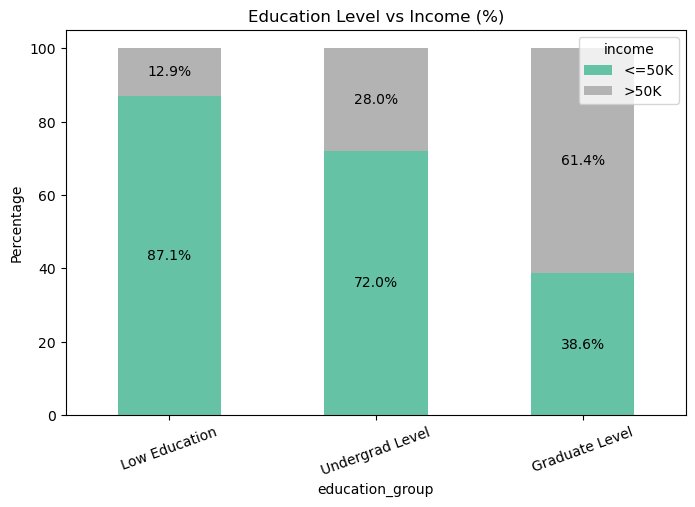

In [31]:
# Create percentage table
ct = pd.crosstab(df_adult['education_group'], df_adult['income'], normalize='index') * 100

ax = ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2' )

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.ylabel("Percentage")
plt.title("Education Level vs Income (%)")
plt.xticks(rotation=20)
plt.show()

People with higher education levels are much more likely to earn above 50K. Undergraduates fall in the middle, while those with lower education mostly stay in the less than 50K range. The chart shows a clear rise in income as education increases.

# Net_Capital vs Income

In [34]:
df_adult[df_adult['net_capital'] != 0].sort_values('net_capital')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,net_capital,log_net_capital,age_bin,education_group
30781,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,-4356,0.000000,Senior (65+),Undergrad Level
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,-4356,0.000000,Senior (65+),Low Education
14756,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,-4356,0.000000,Senior (65+),Low Education
23802,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,-3900,0.000000,Mid Career (36–50),Undergrad Level
20416,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,-3900,0.000000,Late Career (51–65),Low Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12093,24,?,151153,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K,1,99999,11.512925,Young (≤25),Undergrad Level
42356,28,Private,126060,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,99999,0,36,United-States,>50K,1,99999,11.512925,Early Career (26–35),Low Education
24295,31,Private,100252,Bachelors,13,Divorced,Other-service,Not-in-family,Asian-Pac-Islander,Male,99999,0,70,United-States,>50K,1,99999,11.512925,Early Career (26–35),Undergrad Level
4625,47,Private,345493,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,55,Taiwan,>50K,1,99999,11.512925,Mid Career (36–50),Graduate Level


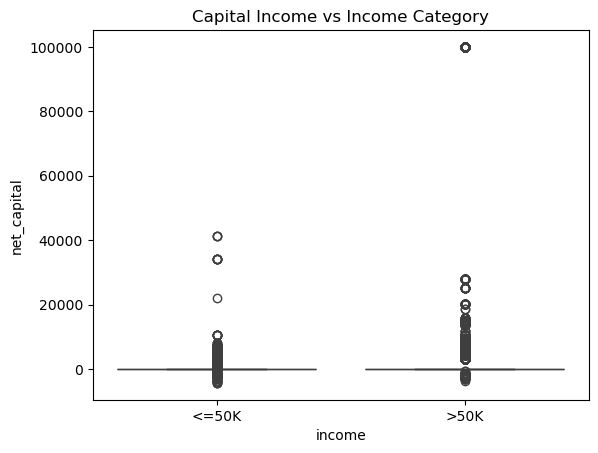

In [35]:
sns.boxplot(data=df_adult, x='income', y='net_capital')
plt.title("Capital Income vs Income Category")
plt.show()

The plot shows a clear separation in capital income between the two groups, with higher‑income individuals having much larger and more variable capital income. Those in the ≤50K group cluster near the bottom with low values, while the >50K group shows a higher median and several large outliers, indicating access to investments or assets that generate additional income. Overall, capital income appears to be a strong differentiator between lower‑ and higher‑earning individuals.

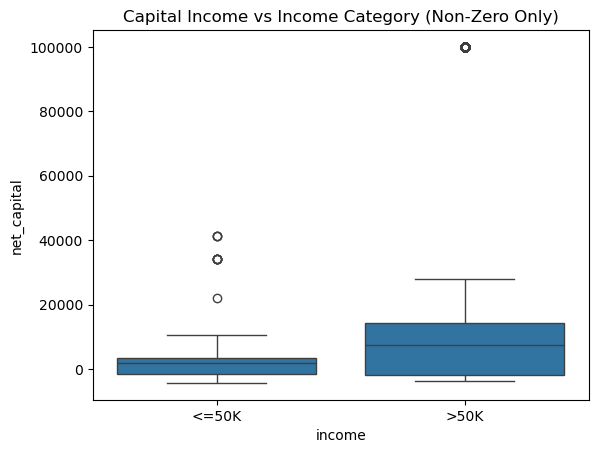

In [36]:
df_nonzero = df_adult[df_adult['net_capital'] != 0]

sns.boxplot(data=df_nonzero, x='income', y='net_capital')
plt.title("Capital Income vs Income Category (Non‑Zero Only)")
plt.show()

People earning more than 50K tend to have much higher capital income, with a noticeably higher median and more extreme values. Those earning 50K or less have much smaller and more tightly grouped capital income, showing limited access to investment-related earnings. Overall, the chart shows that capital income strongly concentrates among higher‑income individuals.

# HOURS-PER-WEEK vs Income

In [38]:
import pandas as pd

# Create bins for hours-per-week
df_adult['hours_bin'] = pd.cut(df_adult['hours-per-week'],bins=[0, 25, 40, 50, 60, 100],labels=['<25', '25-40', '41-50', '51-60', '60+'])

In [39]:
ct_hours = pd.crosstab(df_adult['hours_bin'],df_adult['income'], normalize='index') * 100   # row-wise percentages

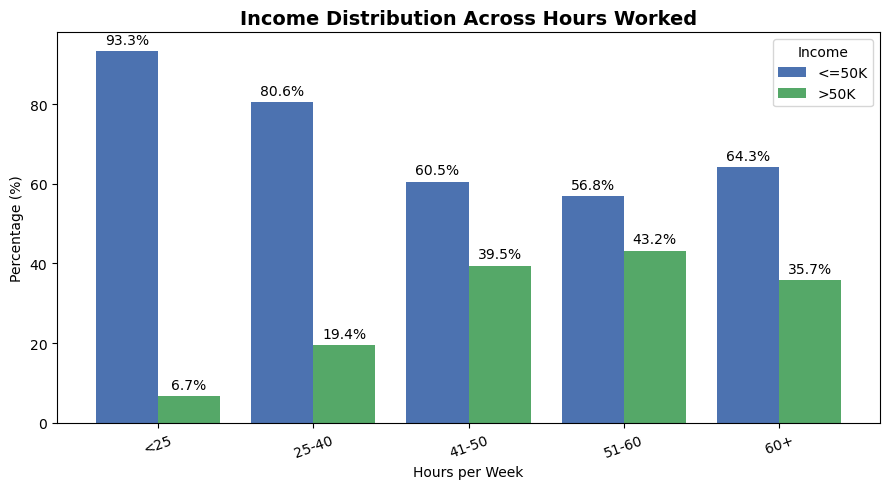

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))

ct_hours.plot(kind='bar',ax=ax, width=0.8,color=['#4C72B0', '#55A868'])

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

ax.set_title('Income Distribution Across Hours Worked', fontsize=14, fontweight='bold')
ax.set_xlabel('Hours per Week')
ax.set_ylabel('Percentage (%)')
plt.xticks(rotation=20)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

The chart shows that people who work more hours are generally more likely to earn above $50K, especially between 25 and 50 hours per week

# ═══════════════════════════════════════════════════════════════
#      BIVARIATE - CATEGORICAL FEATURES vs INCOME (TARGET)
# ═══════════════════════════════════════════════════════════════

In [44]:
print(df_adult.isnull().sum())

age                  0
workclass          963
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation         966
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     274
income               0
income_binary        0
net_capital          0
log_net_capital      0
age_bin              0
education_group      0
hours_bin            0
dtype: int64


In [45]:
m=df_adult['workclass'].mode()
print(m)
o=df_adult['occupation'].mode()
print(o)
n=df_adult['native-country'].mode()
print(n)

0    Private
Name: workclass, dtype: object
0    Prof-specialty
Name: occupation, dtype: object
0    United-States
Name: native-country, dtype: object


In [46]:
# filling the values replace  ‘?’ is ‘Workclass’ column by ‘Private’, ‘Occupation’ column by ‘Prof-speciality’ 
#and ‘Native_country’by ‘United_States’.
df_adult['workclass']=df_adult['workclass'].replace('?','Private')
df_adult['occupation']=df_adult['occupation'].replace('?','Prof-specialty')
df_adult['native-country']=df_adult['native-country'].replace('?',' United-States')

In [47]:
print(df_adult['occupation'].value_counts())

occupation
Prof-specialty       8015
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


# 1. WORKCLASS vs INCOME

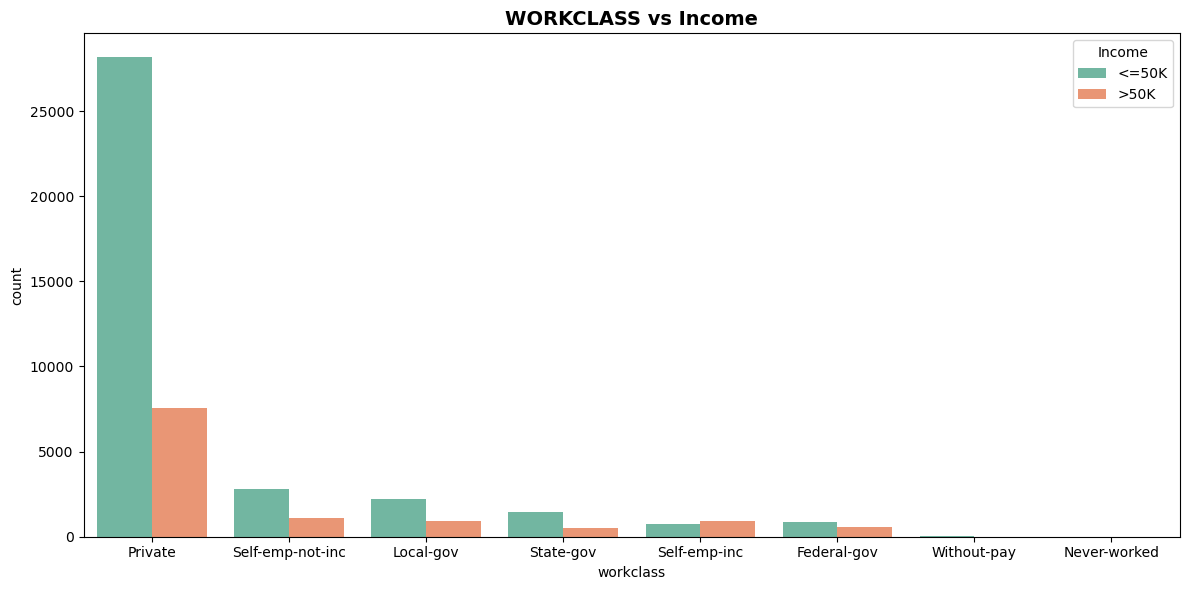

In [48]:
# Count Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("WORKCLASS vs Income", fontsize=14, fontweight="bold")
order = df_adult["workclass"].value_counts().index
sns.countplot(data=df_adult, x="workclass", hue="income", order=order, palette="Set2", ax=ax)
ax.legend(title="Income")
plt.tight_layout()
plt.show()



 This count plot shows that the Private sector dominates the dataset. Notice that 
Self‑employed incorporated have a noticeably higher proportion  of >50K earners.compared to other work classes. 
This tells us work class has some predictive power."

# 2. EDUCATION vs INCOME

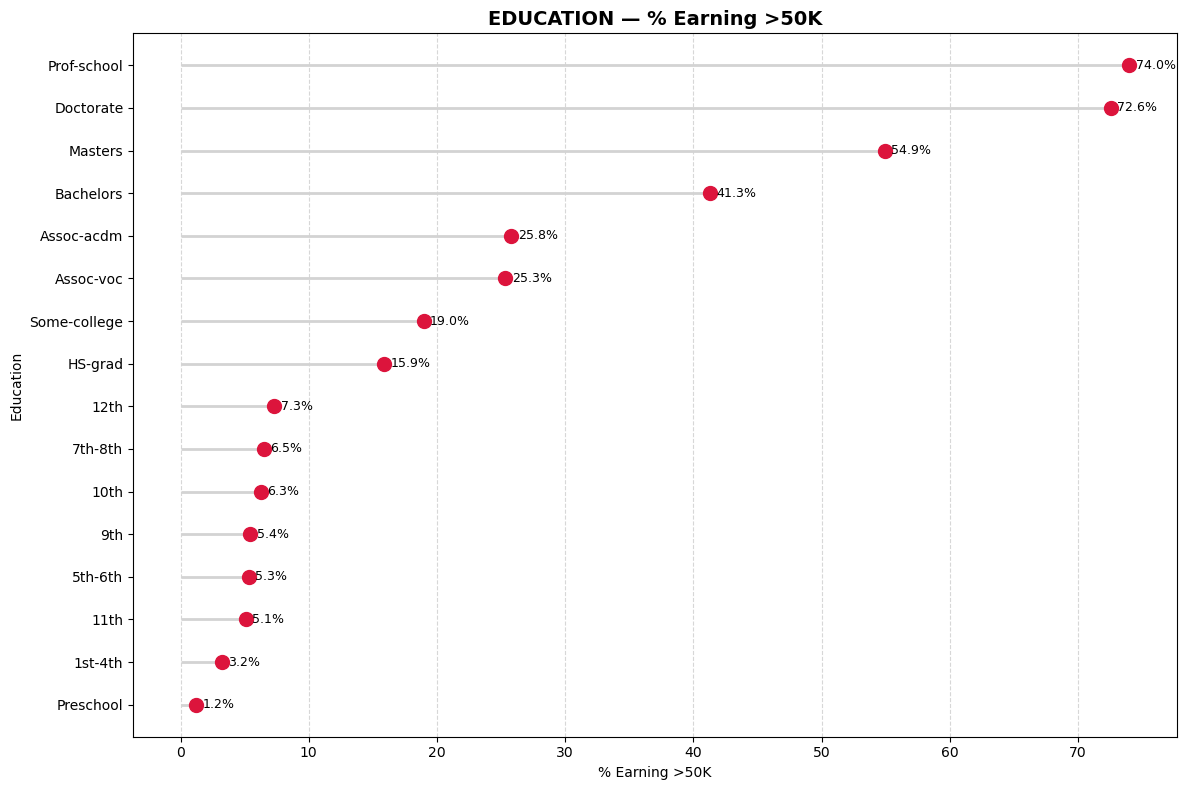

In [49]:
#Dot Plot (Cleveland)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("EDUCATION — % Earning >50K", fontsize=14, fontweight="bold")
rate = df_adult.groupby("education")["income"].apply(
    lambda x: (x == ">50K").mean() * 100).sort_values()
ax.hlines(y=rate.index, xmin=0, xmax=rate.values, color="lightgray", linewidth=2)
ax.plot(rate.values, rate.index, "o", color="crimson", markersize=10)
for i, (val, label) in enumerate(zip(rate.values, rate.index)):
    ax.text(val + 0.5, i, f"{val:.1f}%", va="center", fontsize=9)
ax.set_xlabel("% Earning >50K")
ax.set_ylabel("Education")
ax.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

We can clearly see that higher education = higher income rate — Prof-school and Doctorate top the chart. Education is a strong predictor."

# 3. MARITAL-STATUS vs INCOME

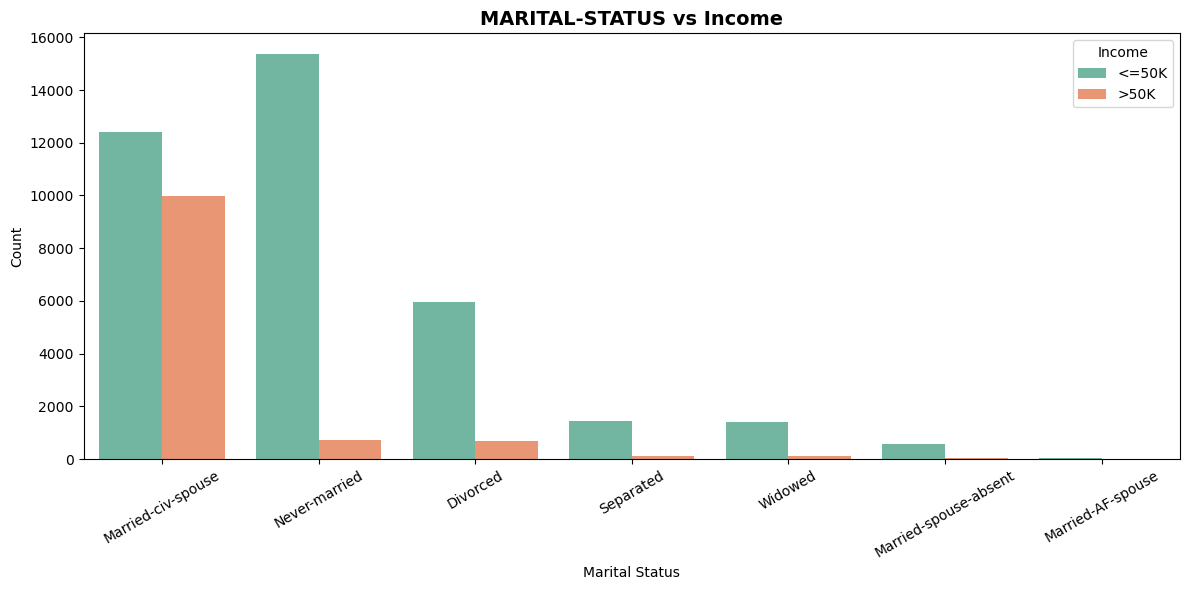

In [50]:
# Count Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("MARITAL-STATUS vs Income", fontsize=14, fontweight="bold")
order = df_adult["marital-status"].value_counts().index
sns.countplot(data=df_adult, x="marital-status", hue="income", order=order, palette="Set2", ax=ax)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=30)
ax.legend(title="Income")
plt.tight_layout()
plt.show()



The count plot shows married-civ-spouse is the largest group >50K earners.. The pie charts shows that — among >50K earners, 
married individuals dominate at ~80%, while among ≤50K earners.
  Being married is one of the strongest predictors of earning >50K in this dataset.

# 4. OCCUPATION vs INCOME

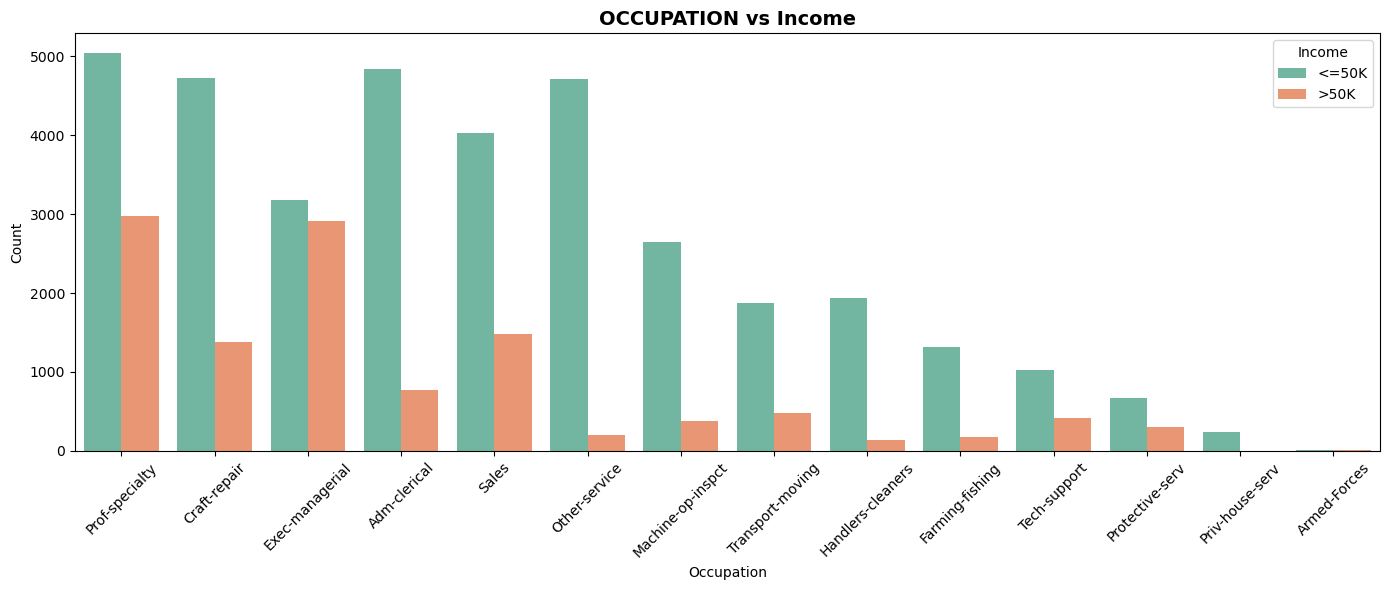

In [51]:
# Count Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title("OCCUPATION vs Income", fontsize=14, fontweight="bold")
order = df_adult["occupation"].value_counts().index
sns.countplot(data=df_adult, x="occupation", hue="income", order=order, palette="Set2", ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=45)
ax.legend(title="Income")
plt.tight_layout()
plt.show()



Different occupations show very different income distributions. 
Exec-managerial and Prof-specialty roles have a much higher proportion of >50K earners.
Occupation is a highly informative feature."

# 5.RELATIONSHIP vs INCOME

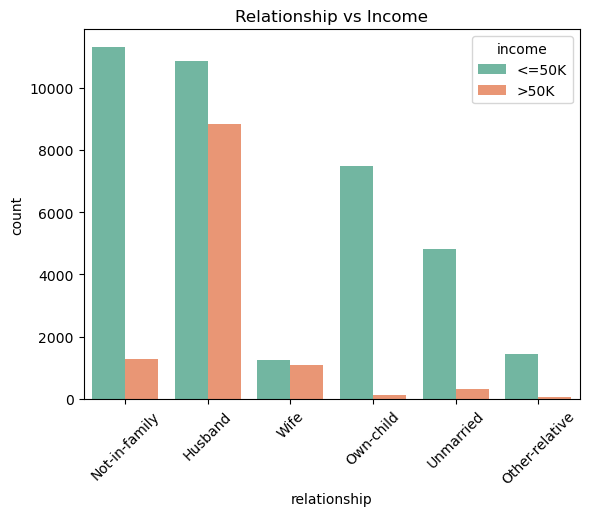

In [52]:

sns.countplot(x='relationship',hue='income', data=df_adult, palette=sns.color_palette("Set2", 2))
plt.xticks(rotation=45)
plt.title("Relationship vs Income")
plt.show()

This chart reveals a clear pattern — marital/spousal relationships are the strongest income predictors. 
Husbands and Wives together account for the vast majority of >50K earners.
In contrast, children, unmarried individuals, and other relatives almost never appear in the high-income group. 

# 6. RACE vs INCOME

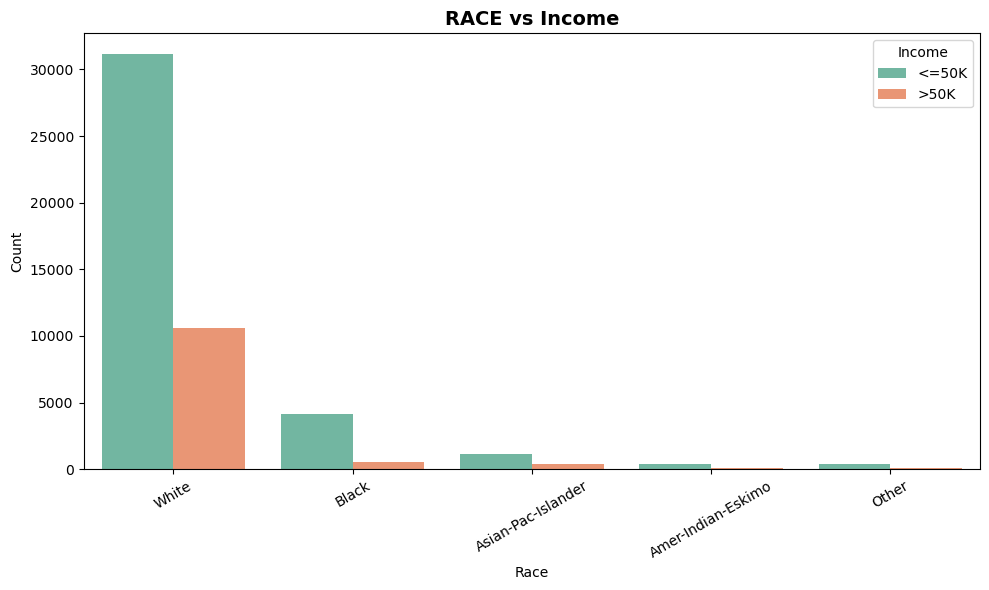

In [53]:
# Count Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("RACE vs Income", fontsize=14, fontweight="bold")
order = df_adult["race"].value_counts().index
sns.countplot(data=df_adult, x="race", hue="income", order=order, palette="Set2", ax=ax)
ax.set_xlabel("Race")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=30)
ax.legend(title="Income")
plt.tight_layout()
plt.show()


White individuals dominate both income groups simply due to dataset composition.
The proportion earning >50K varies by race, but we should be cautious about drawing strong conclusions — 
sample sizes for non-White groups are much smaller, which limits statistical reliability.

# 7. SEX vs INCOME

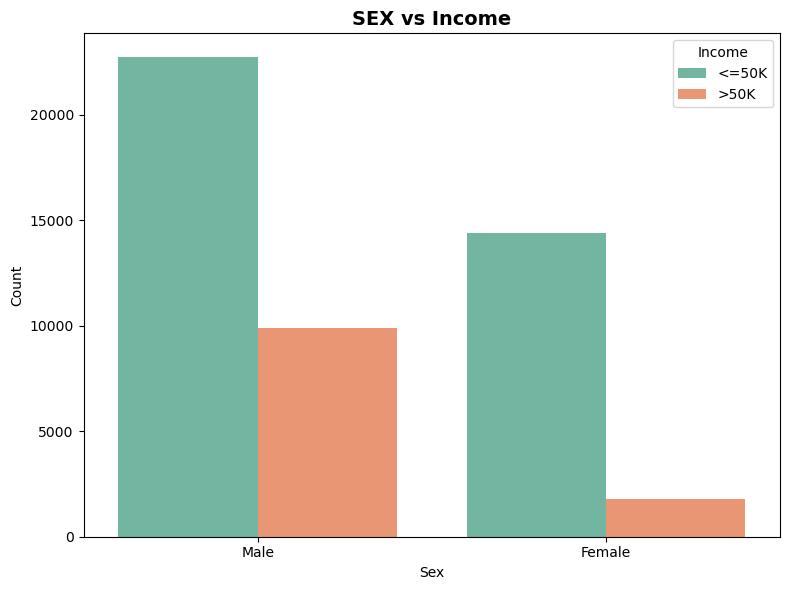

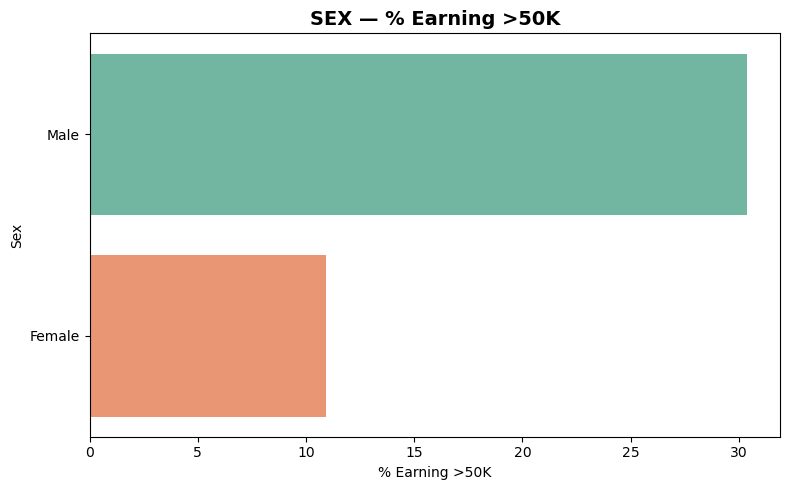

In [54]:
# Count Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("SEX vs Income", fontsize=14, fontweight="bold")
sns.countplot(data=df_adult, x="sex", hue="income", palette="Set2", ax=ax)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(title="Income")
plt.tight_layout()
plt.show()


# >50K Income Rate Bar
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("SEX — % Earning >50K", fontsize=14, fontweight="bold")
rate = (
    df_adult.groupby("sex")["income"]
    .apply(lambda x: (x == ">50K").mean() * 100)
    .reset_index(name="pct")
    .sort_values(by="pct", ascending=False)
)

sns.barplot(data=rate,x="pct", y="sex",hue="sex", palette="Set2", ax=ax)

ax.set_xlabel("% Earning >50K")
ax.set_ylabel("Sex")

plt.tight_layout()
plt.show()


The sex variable shows a strong imbalance.
Men have a significantly higher count of >50K earners compared to women.
When we calculate the percentage earning >50K, men still lead by a wide margin.
This highlights a gender income gap within the dataset.

# 8. NATIVE-COUNTRY vs INCOME

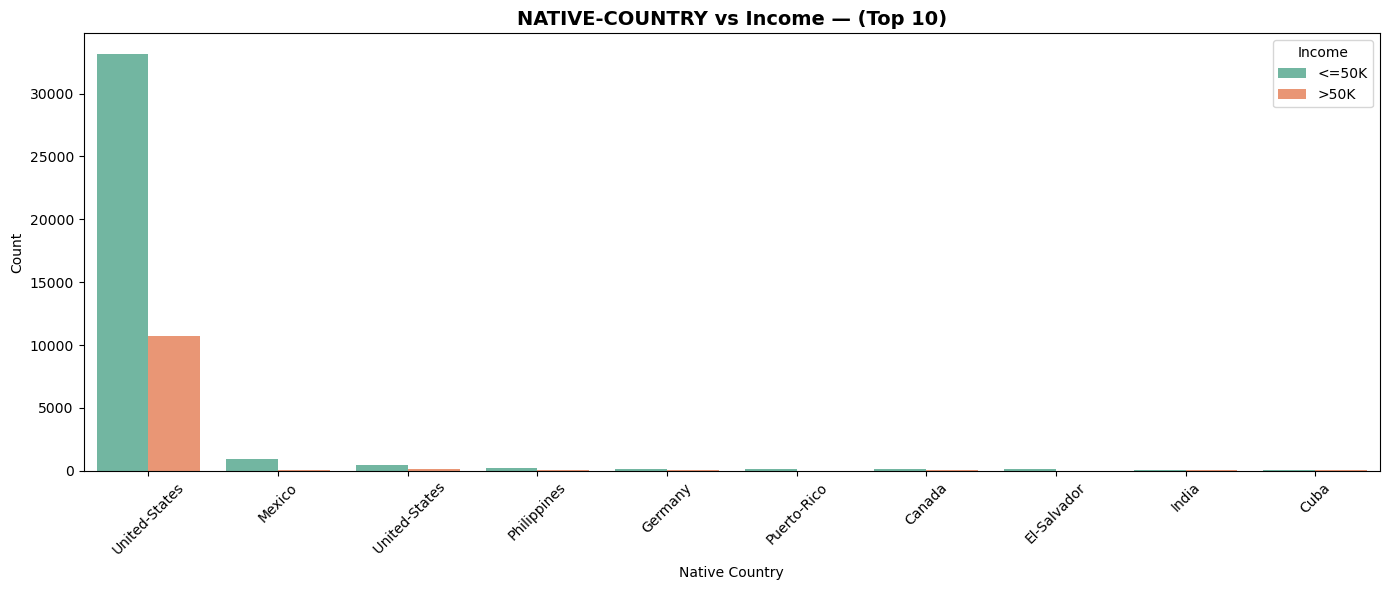

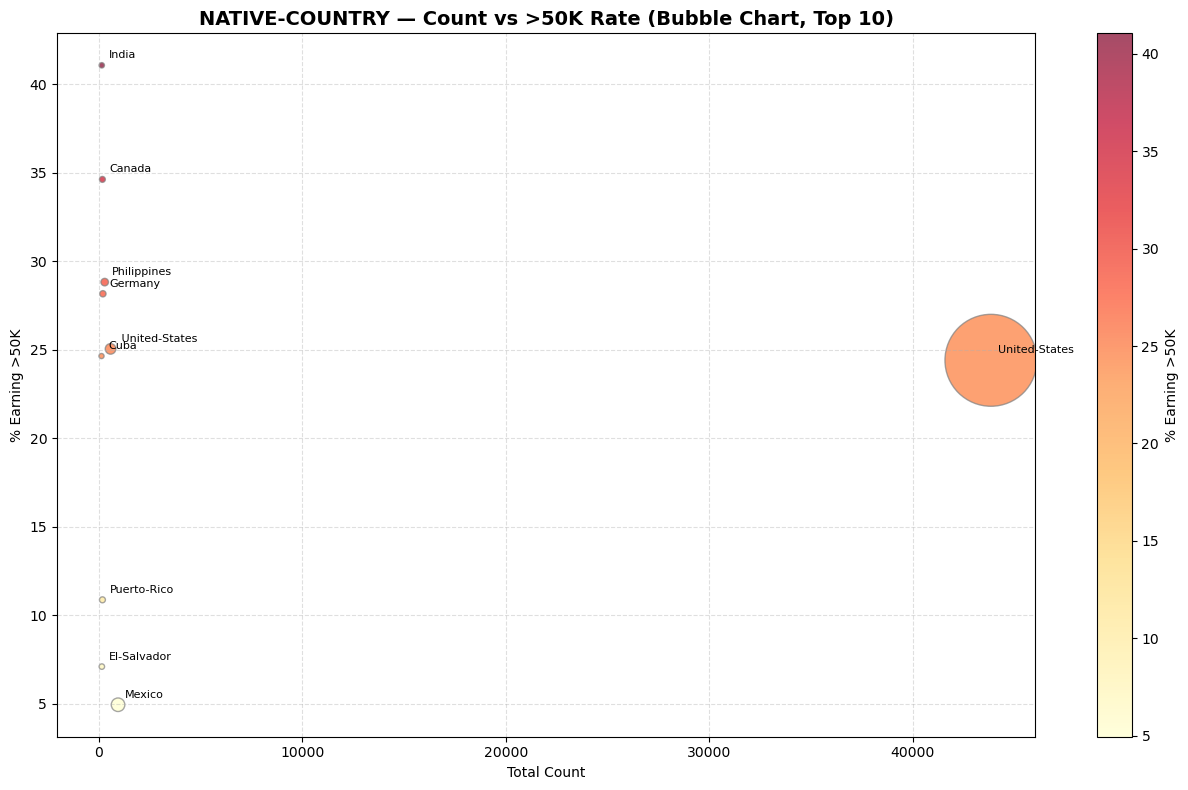

In [55]:
# Count Plot — Top 10 countries only (too many otherwise)
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title("NATIVE-COUNTRY vs Income — (Top 10)", fontsize=14, fontweight="bold")
top10 = df_adult["native-country"].value_counts().head(10).index
sns.countplot(data=df_adult[df_adult["native-country"].isin(top10)], x="native-country", hue="income", order=top10, palette="Set2", ax=ax)
ax.set_xlabel("Native Country")
ax.set_ylabel("Count")
ax.tick_params(axis="x", rotation=45)
ax.legend(title="Income")
plt.tight_layout()
plt.show()

# NATIVE-COUNTRY vs INCOME — Bubble Chart (Top 10) ─────────
fig, ax = plt.subplots(figsize=(13, 8))
ax.set_title("NATIVE-COUNTRY — Count vs >50K Rate (Bubble Chart, Top 10)", fontsize=14, fontweight="bold")
top10 = df_adult["native-country"].value_counts().head(10).index
country_stats = df_adult[df_adult["native-country"].isin(top10)].groupby("native-country").agg(
    total=("income", "count"),
    pct_above=("income", lambda x: (x == ">50K").mean() * 100)
).reset_index()
scatter = ax.scatter(country_stats["total"], country_stats["pct_above"],
                     s=country_stats["total"] / 10, 
                     c=country_stats["pct_above"],
                     cmap="YlOrRd", alpha=0.7, edgecolors="gray")
for _, row in country_stats.iterrows():
    ax.annotate(row["native-country"], 
                (row["total"], row["pct_above"]),
                textcoords="offset points", xytext=(5, 5), fontsize=8)
plt.colorbar(scatter, label="% Earning >50K")
ax.set_xlabel("Total Count")
ax.set_ylabel("% Earning >50K")
ax.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Most individuals in the dataset are from the United States, so the top 10 countries were analyzed.

The bubble chart shows that:
Countries with larger populations in the dataset tend to have lower >50K rates.
Some smaller groups show higher percentages, but sample sizes are too small to generalize.
Overall, native country is a weaker predictor of income compared to education, occupation, or marital status.

## Correlation (Numerical vs Numerical)

### Age vs Education Number

In [57]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_adult["age"], df_adult["education-num"])

print("Correlation:", corr)
print("p-value:", p_value)

Correlation: 0.030940375874514026
p-value: 7.955032710144095e-12


The Pearson correlation coefficient between age and education level is 0.03, which indicates a very weak positive relationship. Since the correlation value is close to zero, there is almost no linear relationship between age and education level.

In [58]:
corr, p_value = pearsonr(df_adult["income_binary"], df_adult["education-num"])

print("Correlation:", corr)
print("p-value:", p_value)

Correlation: 0.33261313066614395
p-value: 0.0


The Pearson correlation coefficient between the variables is 0.333, which indicates a moderate positive relationship between them. This means that as one variable increases, the other variable tends to increase as well.

<center>

# ═══════════════════════════════════════════════════════════════
# MULTIVARIATE ANALYSIS
# ═══════════════════════════════════════════════════════════════

</center>

## Multivariate Analysis

Multivariate analysis examines the relationships between **three or more variables** at the same time. Unlike **univariate analysis** (one variable) or **bivariate analysis** (two variables), multivariate analysis helps understand how multiple features interact together and influence outcomes.

It is a branch of statistics that involves the **simultaneous observation and analysis of more than two variables** to understand their relationships, patterns, and combined effect on an outcome.

It is useful for **identifying patterns, trends, and combined effects** of several variables in the dataset.

---

### Univariate vs Bivariate vs Multivariate

| Type | Variables | Example | Technique |
|---|---|---|---|
| **Univariate** | 1 variable | Age alone | Histogram, Box plots |
| **Bivariate** | 2 variables | Age vs Income | Scatter Plot,Box plots, Correlation |
| **Multivariate** | 3+ variables | Age + Income + Education | Heatmaps, Pair plot, Clustering |

---

### Real World Analogy

> A doctor doesn't just look at **one** symptom.  
> He looks at **blood pressure + heart rate + sugar level + age** — all together — to diagnose a patient.  
> That's **multivariate thinking.**

---

### Why Do We Need It?

- Real datasets have **dozens or hundreds of features**
- Variables **influence each other** — you can't study them in isolation
- Helps answer: *"How do multiple factors **together** affect the outcome?"*

---

### How It Works (Step by Step)

| Step | Action |
|------|--------|
| **1** | Collect data with multiple variables (features) |
| **2** | Check relationships between variables (correlation) |
| **3** | Identify patterns, heatmap, clusters, or trends |
| **4** | Reduce noise / redundant variables |
| **5** | Build a better, more accurate ML model |

---


## Multivariate Analysis Techniques

Multivariate analysis uses various techniques to explore relationships between multiple variables simultaneously.
The following are the basic techniques used in multivariate analysis:

---

### 1. Visual Techniques

Visual techniques help us **see and understand** the relationships between multiple variables through graphs and plots.

| Technique | Purpose |
|---|---|
| **Heatmap** | Correlation matrix using color intensity |
| **Pair Plot** | Scatter plots between all variable pairs |
| **3D Scatter Plot** | Visualize 3 variables simultaneously |
| **Parallel Coordinates Plot** | Compare multiple variables across observations |

---

### 2. Statistical Tests

Statistical tests help us **measure and validate** the relationships between variables mathematically.

| Technique | Purpose |
|---|---|
| **Chi-Square Test** | Relationship between categorical variables |
| **ANOVA** | Compare means across multiple groups |
| **MANOVA** | ANOVA but with multiple dependent variables |
| **Correlation Matrix** | Measure strength between all variables |

---

### 3. Dimensionality Reduction

Dimensionality reduction techniques help us **reduce the number of variables** while retaining important information.

| Technique | Purpose |
|---|---|
| **PCA** (Principal Component Analysis) | Reduce features, find key patterns |
| **LDA** (Linear Discriminant Analysis) | Reduce dimensions + classify |
| **Factor Analysis** | Discover hidden / latent variables |

---

### 4. Clustering & Grouping

Clustering techniques help us **group similar data points** together without prior labels.

| Technique | Purpose |
|---|---|
| **K-Means Clustering** | Group similar data points into K clusters |
| **Hierarchical Clustering** | Tree-based grouping of data points |

---

### 5. Regression Based

Regression techniques help us **predict outcomes** using multiple variables together.

| Technique | Purpose |
|---|---|
| **Multiple Linear Regression** | Predict continuous outcome using many features |
| **Logistic Regression** | Classify outcome using many features |

---

### Techniques by Level

| Level | Techniques |
|---|---|
| **🟢 Basic** | Heatmap, Pair Plot, Correlation Matrix |
| **🟡 Intermediate** | Chi-Square, ANOVA, PCA |
| **🔴 Advanced** | MANOVA, LDA, Factor Analysis |

---

> 💡 **Note:** In this notebook, we will be exploring the **Basic Level Techniques** —
> Heatmap, Pair Plot, Chi-Square Test, and ANOVA Test.

### ✅ Advantages & ❌ Disadvantages

| ✅ Advantages | ❌ Disadvantages |
|---|---|
| More realistic — real world has many variables | Complex to interpret |
| Better accuracy in predictions | Computationally expensive |
| Reveals hidden patterns between features | Requires larger datasets |
| Reduces redundant features | Risk of overfitting |

---

<br>
<br>
<center>

# ✦ ─── CORRELATION HEATMAP ANALYSIS ─── ✦

</center>

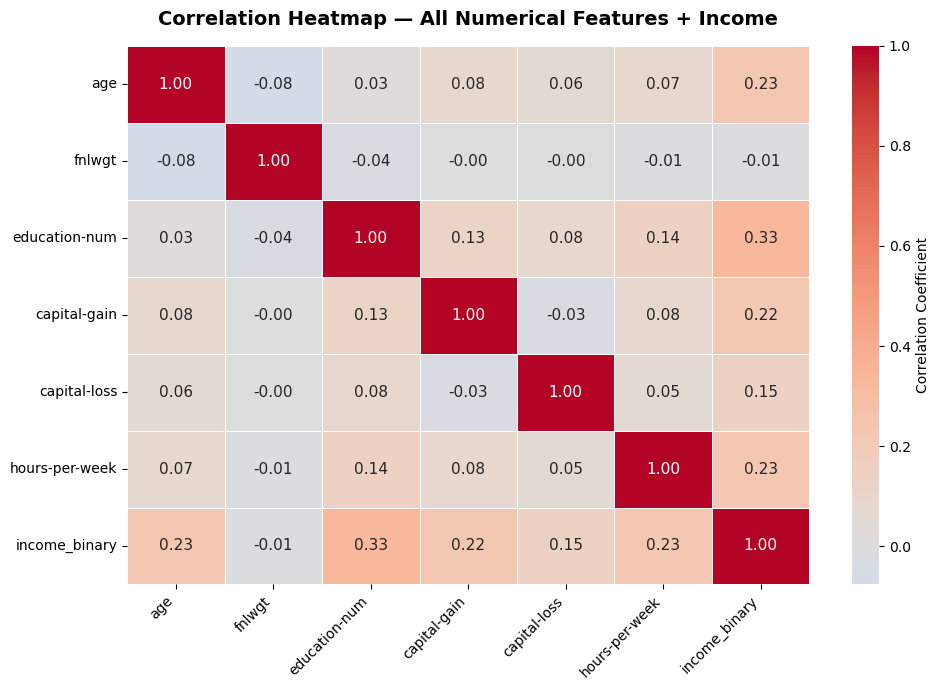

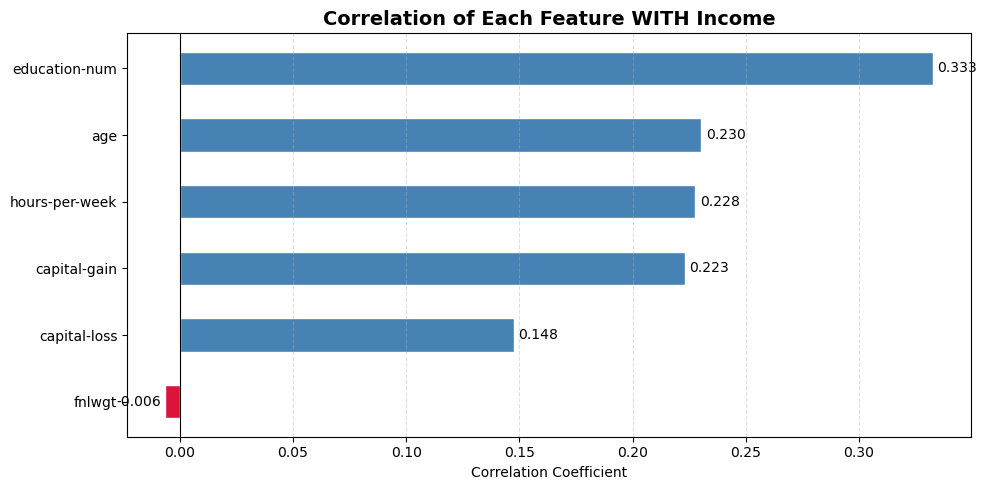

In [59]:

# ── Step 1: Select features + compute correlation 
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "income_binary"]
df_corr  = df_adult[num_cols].copy()
corr     = df_corr.corr()

# ── Step 2: Full Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr,
            annot      = True,
            fmt        = ".2f",
            cmap       = "coolwarm",
            center     = 0,
            linewidths = 0.5,
            linecolor  = "white",
            annot_kws  = {"size": 11},
            cbar_kws   = {"label": "Correlation Coefficient"})
plt.title("Correlation Heatmap — All Numerical Features + Income",fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# ── Step 3: Income Correlation Bar Chart 
income_corr = corr["income_binary"].drop("income_binary").sort_values()

fig, ax = plt.subplots(figsize=(10, 5))
colors = ["crimson" if v < 0 else "steelblue" for v in income_corr]
bars   = ax.barh(income_corr.index, income_corr.values, color=colors, edgecolor="white", height=0.5)

for bar, val in zip(bars, income_corr.values):
    ax.text(val + 0.002 if val >= 0 else val - 0.002,
            bar.get_y() + bar.get_height() / 2,
            f"{val:.3f}", va="center",
            ha="left" if val >= 0 else "right", fontsize=10)

ax.axvline(0, color="black", linewidth=0.8)
ax.set_title("Correlation of Each Feature WITH Income", fontsize=14, fontweight="bold")
ax.set_xlabel("Correlation Coefficient")
ax.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Key Findings & Conclusion — Correlation Analysis

From the **Correlation Heatmap**, most features show **weak to moderate correlations**
with each other, which is good for machine learning modeling.

**education-num** has the **strongest correlation with income (0.33)** — meaning higher education leads to higher income. **Age, hours-per-week, and capital-gain** also have a **moderate positive relationship** with income, while **fnlwgt** has almost **no relationship (-0.01)** and can be dropped.

From the **Bar Plot**, the ranking is clear — **education-num is the top predictor**, followed by age, hours-per-week, and capital-gain at similar levels.

> **Conclusion —** education-num is the most important numerical feature for predicting income. Since all correlations are relatively low, categorical features like occupation and marital-status may have a **stronger influence** on income.


<br>
<center>

# ✦ ───── PAIR PLOT ANALYSIS  ────── ✦

</center>
<br>


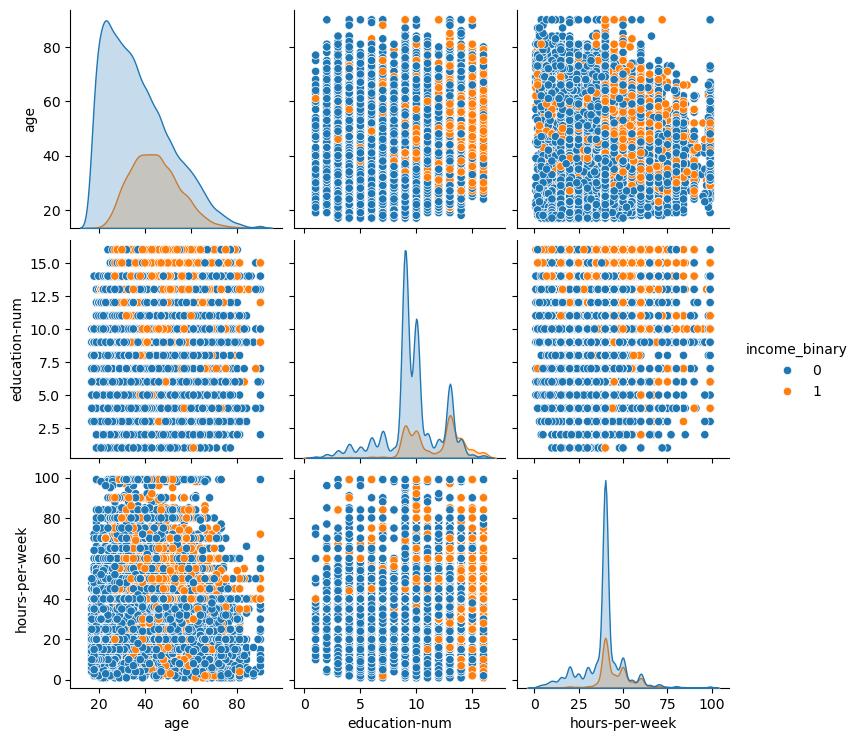

In [60]:
# Select relevant numerical variables along with target variable for pair plot analysis
vars_selected = ['age', 'education-num', 'hours-per-week', 'income_binary']

# Plot pairwise relationships between selected variables, colored by income category
sns.pairplot(df_adult[vars_selected], hue='income_binary')

plt.show()

### Key Findings & Conclusion — Pair Plot Analysis

From the **diagonal plots** — **age** is right-skewed, meaning most people are between 20–40 years old. **education-num** shows a peak at level 9–10 (high school), and **hours-per-week** peaks sharply at 40 hours (standard work week).

From the **scatter plots** — **higher education-num** shows a clear tendency towards **orange (higher income)**, confirming it as a strong predictor. **Age** also shows that middle-aged individuals (35–55) are more likely to earn above 50K. **hours-per-week** shows orange dots slightly more concentrated around 40–60 hours.

> **Conclusion —** education-num and age are the most visible separators between income groups. Higher education and middle age are strongly associated with earning above 50K. hours-per-week shows a weaker separation between income groups.

<br>
<center>

# ✦ ───── ANOVA ANALYSIS  ────── ✦

</center>
<br>


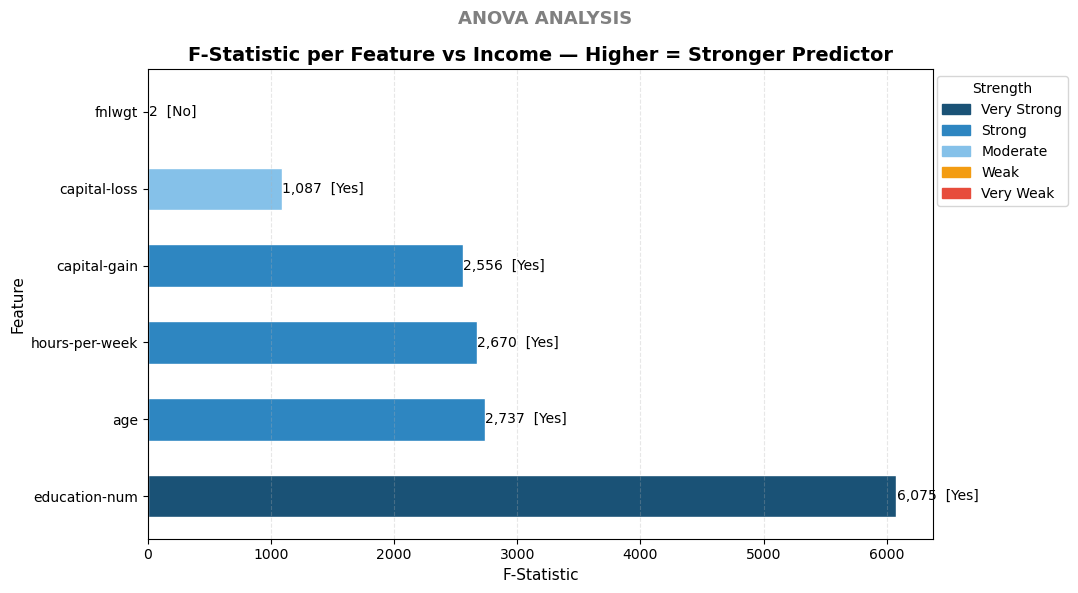

Feature,F-Statistic,p-value,Significant,Strength
education-num,"6,075.37",0.0000e+00,Yes,Very Strong
age,"2,737.21",0.0000e+00,Yes,Strong
hours-per-week,"2,670.36",0.0000e+00,Yes,Strong
capital-gain,"2,556.18",0.0000e+00,Yes,Strong
capital-loss,"1,087.03",8.5436e-236,Yes,Moderate
fnlwgt,1.96,1.6125e-01,No,Very Weak


In [61]:
# ── Step 1: Run ANOVA for all numerical features 
numerical = ["age", "fnlwgt", "education-num","capital-gain", "capital-loss", "hours-per-week"]

group1 = df_adult[df_adult["income"] == "<=50K"]  # Group 1
group2 = df_adult[df_adult["income"] == ">50K"]   # Group 2

anova_results = []
for col in numerical:
    f_stat, p_val = f_oneway(group1[col], group2[col])
    anova_results.append({
        "Feature"    : col,
        "F-Statistic": round(f_stat, 2),
        "p-value"    : p_val,
        "Significant": "Yes" if p_val < 0.05 else "No",
        "Strength"   : "Very Strong" if f_stat > 1000 else
                       "Strong"      if f_stat > 500  else
                       "Moderate"    if f_stat > 100  else
                       "Weak"        if f_stat > 10   else "Very Weak"
    })

anova_df = pd.DataFrame(anova_results).sort_values("F-Statistic", ascending=False)

# ── F-Statistic Bar Chart — Fixed Thresholds 
color_map = {
    "Very Strong": "#1A5276",
    "Strong"     : "#2E86C1",
    "Moderate"   : "#85C1E9",
    "Weak"       : "#F39C12",
    "Very Weak"  : "#E74C3C",
}

# Calculate Strength based on actual data range
def get_strength(f):
    if f > 5000:   return "Very Strong"
    elif f > 2500: return "Strong"
    elif f > 1000: return "Moderate"
    elif f > 100:  return "Weak"
    else:          return "Very Weak"

anova_df["Strength"] = anova_df["F-Statistic"].apply(get_strength)

fig, ax = plt.subplots(figsize=(11, 6))
fig.suptitle("ANOVA ANALYSIS", fontsize=13, fontweight="bold", color="gray")
ax.set_title("F-Statistic per Feature vs Income — Higher = Stronger Predictor",
             fontsize=14, fontweight="bold")

colors = [color_map[s] for s in anova_df["Strength"]]
bars   = ax.barh(anova_df["Feature"], anova_df["F-Statistic"],
                 color=colors, edgecolor="white", height=0.55)

for bar, val, sig in zip(bars, anova_df["F-Statistic"], anova_df["Significant"]):
    label = f"{val:,.0f}  [Yes]" if sig == "Yes" else f"{val:,.0f}  [No]"
    ax.text(bar.get_width() + 5,
            bar.get_y() + bar.get_height() / 2,
            label, va="center", fontsize=10)

ax.set_xlabel("F-Statistic", fontsize=11)
ax.set_ylabel("Feature", fontsize=11)
ax.grid(axis="x", linestyle="--", alpha=0.3)
ax.legend(handles=[mpatches.Patch(color=c, label=l) for l, c in color_map.items()],title="Strength", bbox_to_anchor=(1.18, 1))
plt.tight_layout()
plt.show()


# ── Step 2: Styled Summary Table 
def highlight_anova(row):
    if row["Significant"] == "No":
        return ["background-color: #fadbd8"] * len(row)
    elif row["F-Statistic"] > 1000:
        return ["background-color: #1A5276; color: white"] * len(row)
    elif row["F-Statistic"] > 500:
        return ["background-color: #d4e6f1"] * len(row)
    elif row["F-Statistic"] > 100:
        return ["background-color: #d5f5e3"] * len(row)
    else:
        return ["background-color: #fef9e7"] * len(row)

anova_df.style\
    .apply(highlight_anova, axis=1)\
    .format({"F-Statistic": "{:,.2f}", "p-value": "{:.4e}"})\
    .set_caption("ANOVA Test — Numerical Features vs Income")\
    .hide(axis="index")

### Key Findings & Conclusion — ANOVA Analysis

From the **ANOVA Test**, all features except **fnlwgt** show a **statistically significant relationship** with income (p-value < 0.05).

**education-num** has the **highest F-Statistic of 6,075** — making it the **strongest predictor** of income by a large margin. **age (2,737), hours-per-week (2,670), and capital-gain (2,556)** all show a **strong relationship** with income at similar levels. **capital-loss (1,087)** shows a **moderate relationship**, while **fnlwgt (1.96)** is the only feature that is **not significant** (p-value = 0.16) — confirming it should be dropped.

> **Conclusion —** The ANOVA test confirms that **education-num is the most powerful predictor** of income, followed by age, hours-per-week, and capital-gain. **fnlwgt has no significant effect** on income and should be excluded from the model. All significant features have a p-value of 0.0000, meaning the results are **highly reliable.**

<br>
<center>

# ✦ ───── CHI-SQUARE ANALYSIS  ────── ✦

</center>
<br>

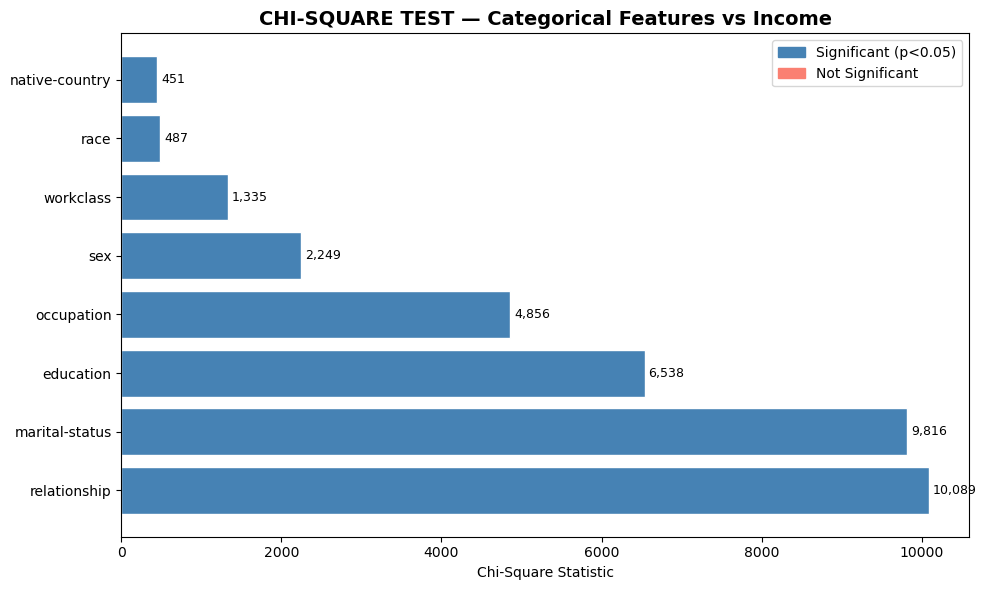

Feature,Chi2,p-value,Type,Significant
relationship,"10,088.72",0.00e+00,Categorical,Yes
marital-status,"9,816.02",0.00e+00,Categorical,Yes
education,"6,537.97",0.00e+00,Categorical,Yes
education-num (binned),"5,949.74",0.00e+00,Numerical,Yes
occupation,"4,855.91",0.00e+00,Categorical,Yes
age (binned),"4,273.64",0.00e+00,Numerical,Yes
hours-per-week (binned),"3,206.44",0.00e+00,Numerical,Yes
sex,"2,248.85",0.00e+00,Categorical,Yes
capital-loss (binned),"1,864.53",0.00e+00,Numerical,Yes
workclass,"1,334.51",5.70e-284,Categorical,Yes


In [62]:
# ── Chi-Square Test Analysis 
# Define all categorical features to test against income
categorical = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
chi2_results = []
for col in categorical:
    ct = pd.crosstab(df_adult[col], df_adult["income"])
    chi2, p, dof, _ = chi2_contingency(ct)
    chi2_results.append({"Feature": col, "Chi2": chi2, "p-value": p})
chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2", ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("CHI-SQUARE TEST — Categorical Features vs Income", 
             fontsize=14, fontweight="bold")
colors = ["steelblue" if p < 0.05 else "salmon" for p in chi2_df["p-value"]]
bars = ax.barh(chi2_df["Feature"], chi2_df["Chi2"], color=colors, edgecolor="white")
ax.set_xlabel("Chi-Square Statistic")

# ── Add value labels to each bar ─────────────────────────────────
for bar, val in zip(bars, chi2_df["Chi2"]):
    ax.text(bar.get_width() + 50,        # x position (slightly right of bar)
            bar.get_y() + bar.get_height()/2,  # y position (center of bar)
            f"{val:,.0f}",               # format number with commas
            va="center", fontsize=9, color="black")

from matplotlib.patches import Patch
ax.legend(handles=[Patch(color="steelblue", label="Significant (p<0.05)"),
                   Patch(color="salmon",    label="Not Significant")])
plt.tight_layout()
plt.show()


# Chi-square analysis table format

# ── Step 1: Bin numerical features ──────────────────────────────
df_chi = df_adult.copy()
df_chi["age_bin"]            = pd.cut(df_chi["age"],            bins=5)
df_chi["fnlwgt_bin"]         = pd.cut(df_chi["fnlwgt"],         bins=5)
df_chi["education_num_bin"]  = pd.cut(df_chi["education-num"],  bins=5)
df_chi["capital_gain_bin"]   = pd.cut(df_chi["capital-gain"],   bins=5)
df_chi["capital_loss_bin"]   = pd.cut(df_chi["capital-loss"],   bins=5)
df_chi["hours_week_bin"]     = pd.cut(df_chi["hours-per-week"], bins=5)

# ── Step 2: Define all features ──────────────────────────────────
all_features = {
    "workclass"              : "workclass",
    "education"              : "education",
    "marital-status"         : "marital-status",
    "occupation"             : "occupation",
    "relationship"           : "relationship",
    "race"                   : "race",
    "sex"                    : "sex",
    "native-country"         : "native-country",
    "age (binned)"           : "age_bin",
    "fnlwgt (binned)"        : "fnlwgt_bin",
    "education-num (binned)" : "education_num_bin",
    "capital-gain (binned)"  : "capital_gain_bin",
    "capital-loss (binned)"  : "capital_loss_bin",
    "hours-per-week (binned)": "hours_week_bin",
}

# ── Step 3: Run Chi-Square ────────────────────────────────────────
chi2_results = []
for label, col in all_features.items():
    ct = pd.crosstab(df_chi[col], df_chi["income"])
    chi2, p, dof, _ = chi2_contingency(ct)
    chi2_results.append({
        "Feature"    : label,
        "Chi2"       : round(chi2, 2),
        "p-value"    : p,
        "DOF"        : dof,
        "Type"       : "Numerical" if "(binned)" in label else "Categorical",
        "Significant": "Yes" if p < 0.05 else "No"
    })

chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2", ascending=False)

# ── Step 4: Styled Table ─────────────────────────────────────────
chi2_df_display = chi2_df[["Feature", "Chi2", "p-value", "Type", "Significant"]].copy()

def highlight_rows(row):
    if row["Significant"] == "Yes" and row["Type"] == "Categorical":
        return ["background-color: #d4e6f1"] * len(row)
    elif row["Significant"] == "Yes" and row["Type"] == "Numerical":
        return ["background-color: #d5f5e3"] * len(row)
    else:
        return ["background-color: #fadbd8"] * len(row)

chi2_df_display.style\
    .apply(highlight_rows, axis=1)\
    .format({"Chi2": "{:,.2f}", "p-value": "{:.2e}"})\
    .set_caption("Chi-Square Test — All Features vs Income")\
    .hide(axis="index")



### Key Findings & Conclusion — Chi-Square Test Analysis

From the **Chi-Square Test**, combining both categorical and binned numerical features, **13 out of 14 features** show a **statistically significant relationship** with income (p-value < 0.05), except **fnlwgt** which is the only **non-significant feature** (p-value = 0.65).

**relationship (10,088)** and **marital-status (9,816)** are the **strongest predictors** of income among all features — both categorical. **education (6,537)** and **occupation (5,788)** also show a very strong relationship with income. Among numerical features, **education-num (5,949)** and **age (4,273)** are the most significant.

From the **Bar Plot** — all categorical features are significant (shown in blue), with **relationship and marital-status clearly dominating** over other features. **race and native-country** show the **weakest relationships** among categorical 
features and can be considered for removal in future modeling.

> **Conclusion —** The Chi-Square test confirms that **relationship and marital-status are the most influential categorical features** for predicting income, followed by education and occupation. This confirms that **categorical features play a bigger role** in income prediction than numerical features. **fnlwgt remains insignificant** across all tests and must be dropped. **native-country and race** are the weakest predictors and should be considered for removal to build a cleaner, more efficient model.

## Findings & Conclusion:

---

## Summary of All Analysis

| Analysis | Key Finding |
|---|---|
| **Correlation Heatmap** | education-num is the strongest numerical predictor (0.33) |
| **Pair Plot** | Higher education + middle age = higher income tendency |
| **ANOVA Test** | education-num dominates with F-Statistic of 6,075 |
| **Chi-Square Test** | relationship & marital-status are the strongest categorical predictors |

---

## Conclusion:

- **Income prediction** is driven by a combination of both **categorical and numerical features**
- **Education** — both as a number and as a category — is the **single most important 
  factor** in determining whether a person earns above or below 50K
- **Relationship status and marital-status** are equally powerful predictors 
  from the categorical side
- Features like **age, hours-per-week, capital-gain, and occupation** 
  provide additional predictive power
- **fnlwgt is irrelevant** across all tests and should be **excluded from the model**
- **race and native-country** show the **weakest relationships** among all features 
  and should be **considered for removal** to build a cleaner and more efficient model
- Overall, this analysis provides a **strong foundation** for building a machine 
  learning model — with **clear, validated, and reliable features** identified 
  through multiple statistical and visual techniques

---

# <center> Thankyou! </center>

---